<a href="https://colab.research.google.com/github/danielm322/Signal-Processing/blob/main/Guitar_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell only useful in Colab
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.io import wavfile
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Read files
# samplerate1, data1 = wavfile.read('/content/gdrive/My Drive/M2 AI Signal Processing/01 Guitar tuner/string_1.wav')
# samplerate2, data2 = wavfile.read('/content/gdrive/My Drive/M2 AI Signal Processing/01 Guitar tuner/string_2.wav')
# samplerate3, data3 = wavfile.read('/content/gdrive/My Drive/M2 AI Signal Processing/01 Guitar tuner/string_3.wav')
samplerate1, data1 = wavfile.read('./string_1.wav')
samplerate2, data2 = wavfile.read('./string_2.wav')
samplerate3, data3 = wavfile.read('./string_3.wav')
N1 = len(data1)
N2 = len(data2)
N3 = len(data3)

In [ ]:
# Fourier transforms and then we take only the first half of the spectrum
F_t1 = np.fft.fft(data1)
F_t1 = F_t1[:int(len(F_t1)/2)]

F_t2 = np.fft.fft(data2)
F_t2 = F_t2[:int(len(F_t2)/2)]

F_t3 = np.fft.fft(data3)
F_t3 = F_t3[:int(len(F_t3)/2)]

In [ ]:
# Frecuencies arrays
f1 = samplerate1*np.arange((N1/2))/N1; 
f2 = samplerate2*np.arange((N2/2))/N2; 
f3 = samplerate3*np.arange((N3/2))/N3; 

In [ ]:
# Expected notes and cents
notes = {'E1': 329.63, 
         'B2': 246.94, 
         'G3': 196.00, 
         'D4': 146.83, 
         'A5': 110.00, 
         'E6': 82.41 }
cents = {'E1': 0.15, 'B2': 0.15, 'G3': 0.15, 'D4': 0.08, 'A5': 0.08, 'E6':0.04}

## First signal

Text(0.5, 1.0, 'Fourier spectrum of first signal')

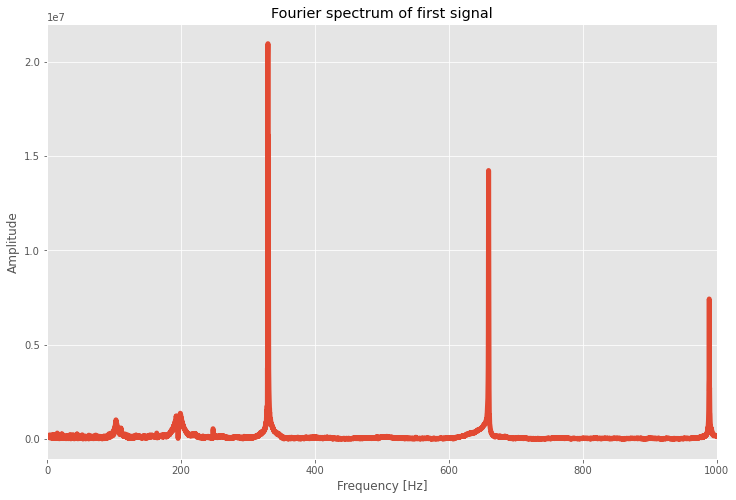

In [ ]:
# Plotting the Fourier spectrum of the signal
plt.figure(figsize=(12,8))
plt.plot(f1, np.abs(F_t1),linewidth=5)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.xlim((0,1000))
plt.title('Fourier spectrum of the first signal')

In [ ]:
# Here the chosen note is the first peak frequency in the spectrum, which is also the maximum of the spectrum.
sample1 = f1[np.argmax(F_t1)]

# Find the closest note to the found one
result1_dict = {key: abs(notes[key] - sample1) for key in notes}
result1 = min(result1_dict, key=result1_dict.get)

print('Found note is:', result1, 'with a deviation of ',round( (sample1-notes.get(result1))/cents.get(result1),2 ), 'cents')

Found note is: E1 with a deviation of  2.81 cents


## Second Signal 

Text(0.5, 1.0, 'Fourier spectrum of second signal')

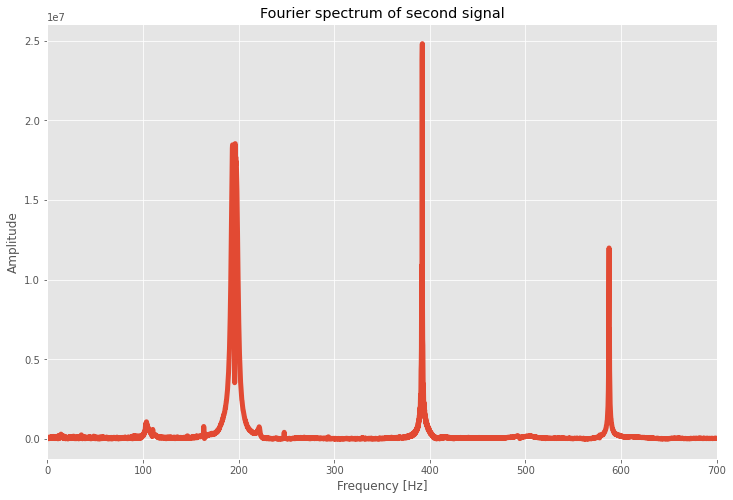

In [ ]:
# Plotting the Fourier spectrum of the signal
plt.figure(figsize=(12,8))
plt.plot(f2,np.abs(F_t2),linewidth=5)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.xlim((0,700))
plt.title('Fourier spectrum of the second signal')

In [ ]:
# In this case we pick the wider peak instead of the peak with the maximum value, since it contains the most energy and, also, no notes above 330Hz tune a guitar string.
# To select the note we find the frequencies whose transform is above the given threshold in the first peak and average them.
sample2 = f2[find_peaks(np.abs(F_t2), height=1.5*1e7)[0]][:4].mean()
sample2 = f2[np.argmax(F_t2)]

# Find the closest note to the found one
result2_dict = {key: abs(notes[key] - sample2) for key in notes}
result2 = min(result2_dict, key=result2_dict.get)

print('Found note is:', result2, 'with a deviation of ',round( (sample2-notes.get(result2))/cents.get(result2),2 ), 'cents')

Found note is: G3 with a deviation of  3.61 cents


## Third sample

Text(0.5, 1.0, 'Fourier spectrum of third signal')

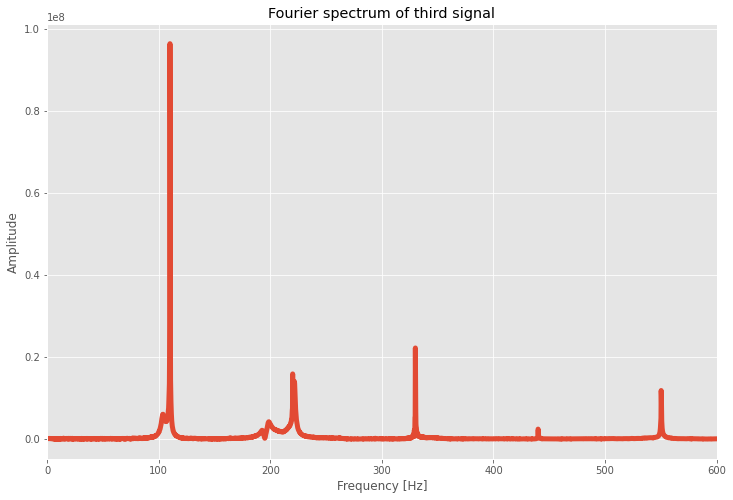

In [ ]:
# Plotting the Fourier spectrum of the signal.
plt.figure(figsize=(12,8))
plt.plot(f3,np.abs(F_t3),linewidth=5)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.xlim((0,600))
plt.title('Fourier spectrum of the third signal')

In [ ]:
# Here the chosen note is again the maximum since it has the most energy.
sample3 = f3[np.argmax(F_t3)]

# Find the closest note to the found one
result3_dict = {key: abs(notes[key] - sample3) for key in notes}
result3 = min(result3_dict, key=result3_dict.get)

print('Found note is:', result3, 'with a deviation of ',round( (sample3-notes.get(result3))/cents.get(result3),2 ), 'cents')

Found note is: A5 with a deviation of  3.75 cents
